In [31]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso

In [32]:
data=pd.read_csv("AQI_Data.csv")

In [33]:
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [34]:
data=data.dropna()

In [35]:
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [36]:
X=data.iloc[:,:-1] ## independent features
Y=data.iloc[:,-1]  ## dependent features

In [37]:
X.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [38]:
Y.isnull().sum()

0

In [39]:
model=ExtraTreesRegressor()

In [40]:
model.fit(X,Y)

ExtraTreesRegressor()

In [41]:
print(model.feature_importances_)

[0.14976965 0.11272625 0.24349627 0.13062245 0.08813186 0.17879822
 0.05287674 0.04357855]


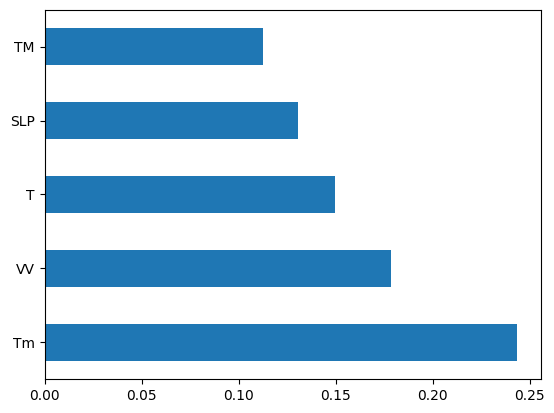

In [42]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Lasso Regression

C:\Users\kanch\AppData\Local\Temp\ipykernel_23636\3269117342.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y)


<Axes: xlabel='PM 2.5', ylabel='Density'>

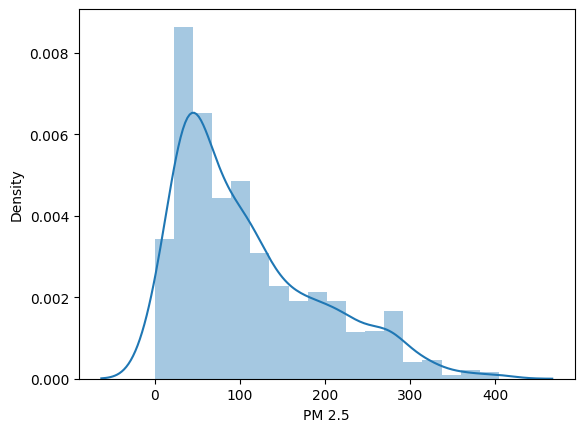

In [43]:
sns.distplot(Y)

### Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
regressor=Lasso()

In [48]:
regressor.fit(X_train,y_train)

Lasso()

In [49]:
regressor.coef_

array([-2.56692199e+00,  2.88757870e+00, -5.61453346e+00, -1.51390043e-03,
       -8.14580326e-01, -3.53314179e+01, -1.59900171e+00,  3.03600119e-01])

In [50]:
regressor.intercept_

321.06121352786647

In [51]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.5324832185062109


In [52]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5296122198998006


### Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,Y,cv=5)

In [54]:
score.mean()

0.47341130136999776

In [55]:
prediction=regressor.predict(X_test)

In [56]:
from sklearn import metrics
import numpy as np

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 42.530406555081576
MSE: 3454.8267264416263
RMSE: 58.777774085462156
